Importing the required libraries 

In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import matplotlib
%matplotlib inline
import csv
from torch.utils.data import Dataset
from torchvision import datasets
from torch.autograd import Variable
import torch.nn.functional as F
# from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from torchvision.io import read_image
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Import Seaborn for a more stylish plot
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator for integer ticks
from skimage import io
from torch.utils.data import Dataset
import glob
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import torch
import pathlib
from prettytable import PrettyTable
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import wandb
from tqdm import tqdm




# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
dataset_path =  'D:\CV_HW_1_QUES2_WILDLIFE_DATASET\Cropped_final'

In [92]:
# # Convert the dataset to a CSV file
data_list = []

# # Iterate through the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.jpg'):
            # Get the class label
            class_label = os.path.basename(root)
            # Get the path to the image
            image_path = os.path.join(root, file)
            # Append the class label and image path to the data_list
            data_list.append([image_path, class_label])



# Specify the path for the CSV file
csv_file_path = 'D:\CV_HW_1_QUES2_WILDLIFE_DATASET\wildlife_dataset.csv'

# Write the data to the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Image_Path', 'Label'])  # Header
    csv_writer.writerows(data_list)

print(data_list)

print(f"CSV file created at: {csv_file_path}")

[['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0001_al_d_s_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0001_al_d_w_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0002_al_d_w_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0002_al_n_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0003_al_d_s_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0004_al_d_w_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0004_al_n_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped_final\\amur_leopard\\0005_al_n_crop00_detections.jpg', 'amur_leopard'], ['D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\Cropped

Mapping

In [3]:
labels_name = ['amur_leopard', 
          'amur_tiger', 
          'birds', 
          'black_bear', 
          'brown_bear', 
          'dog', 
          'roe_deer', 
          'sika_deer', 
          'wild_boar', 
          'people']

labels_map = {
    'amur_leopard': 0,
    'amur_tiger': 1,
    'birds': 2,
    'black_bear': 3,
    'brown_bear': 4,
    'dog': 5,
    'roe_deer': 6,
    'sika_deer': 7,
    'wild_boar': 8,
    'people': 9
}


In [4]:
normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]], std=[x/255.0 for x in [63.0, 62.1, 66.7]]) # mean and std in the order of (R, G, B)

transform = transforms.Compose([transforms.Resize((200,200)), transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [95]:
# # Define the stratified split
# stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)

# # Perform the split
# train_indices, temp_indices = next(stratified_split.split(np.zeros(len(labels)), labels))

# # Further split temp indices into validation and test sets
# val_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=seed)
# val_indices, test_indices = next(val_test_split.split(np.zeros(len(temp_indices)), labels[temp_indices]))

# # Create data loaders for training, validation, and test sets
# train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
# val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)
# test_sampler = torch.utils.data.sampler.SubsetRandomSampler(test_indices)

In [5]:
csv_file_path = 'D:\CV_HW_1_QUES2_WILDLIFE_DATASET\wildlife_dataset.csv'

In [7]:

class CustomDatasetClass(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return image, y_label

In [8]:
#load data
dataset = CustomDatasetClass(csv_file = csv_file_path, root_dir = dataset_path, transform = transform)

Data Distribution in dataset

Splitting the dataset into training, validation, and test sets

In [99]:
df = pd.read_csv(csv_file_path)

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=32).reset_index(drop=True)

# Split the data into train, val, and test sets with stratification
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['Label'], random_state=32, shuffle=True)
val_df, test_df = train_test_split(temp_df, test_size=0.67, stratify=temp_df['Label'], random_state=32, shuffle=True)

#  print ratio to check whether it 0.7:0.1:0.2

# # Print the lengths of train, val, and test sets
# print("Train set length:", len(train_df))
# print("Validation set length:", len(val_df))
# print("Test set length:", len(test_df))

# # Calculate and print the ratios
# total_length = len(train_df) + len(val_df) + len(test_df)
# train_ratio = len(train_df) / total_length
# val_ratio = len(val_df) / total_length
# test_ratio = len(test_df) / total_length

# print("Train ratio:", train_ratio)
# print("Validation ratio:", val_ratio)
# print("Test ratio:", test_ratio)


# Save the split datasets to new CSV files if needed
train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('val_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

In [9]:
train_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\train_dataset.csv'
val_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\val_dataset.csv'
test_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\test_dataset.csv'

In [10]:
tf=transforms.Compose([transforms.ToPILImage(),transforms.Resize((200,200)),transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

Custom Dataset

In [11]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        # image = transforms.ToPILImage()(image)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

In [103]:
train_dataset = CustomImageDataset(annotations_file=train_data_path, img_dir=dataset_path, transform=tf)
val_dataset = CustomImageDataset(annotations_file=val_data_path, img_dir=dataset_path, transform=tf)
test_dataset = CustomImageDataset(annotations_file=test_data_path, img_dir=dataset_path, transform=tf)

Data Visualization

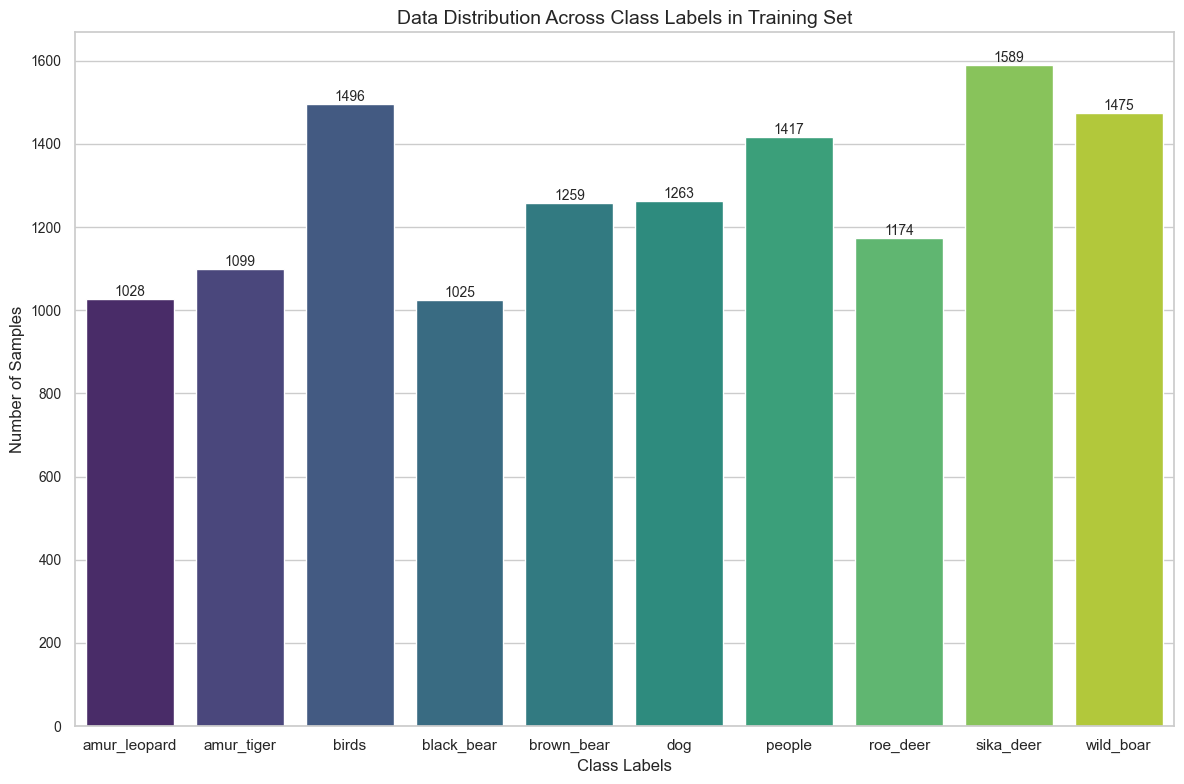

In [104]:
dataset_labels =  dataset.annotations['Label']

class_counts = pd.Series(dataset_labels).value_counts().sort_index()
class_labels = class_counts.index

# Set a stylish Seaborn theme
sns.set(style="whitegrid")

# Plot the data distribution with Seaborn
plt.figure(figsize=(12, 8))
plot = sns.barplot(x=class_labels, y=class_counts, palette="viridis")  # Use a different color palette if needed

# Add annotations (labels) on top of the bars
for i, count in enumerate(class_counts):
    plot.text(i, count + 0.1, f"{count}", ha="center", va="bottom", fontsize=10)

# Adjust the plot appearance
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Data Distribution Across Class Labels in Training Set', fontsize=14)
# plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust font size for y-axis ticks

# Force integer ticks on the y-axis
plot.yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.tight_layout()  # Ensure tight layout to avoid cropping labels
plt.show()


Label
amur_leopard    102
amur_tiger      109
birds           148
black_bear      101
brown_bear      125
dog             125
people          140
roe_deer        116
sika_deer       157
wild_boar       146
Name: count, dtype: int64


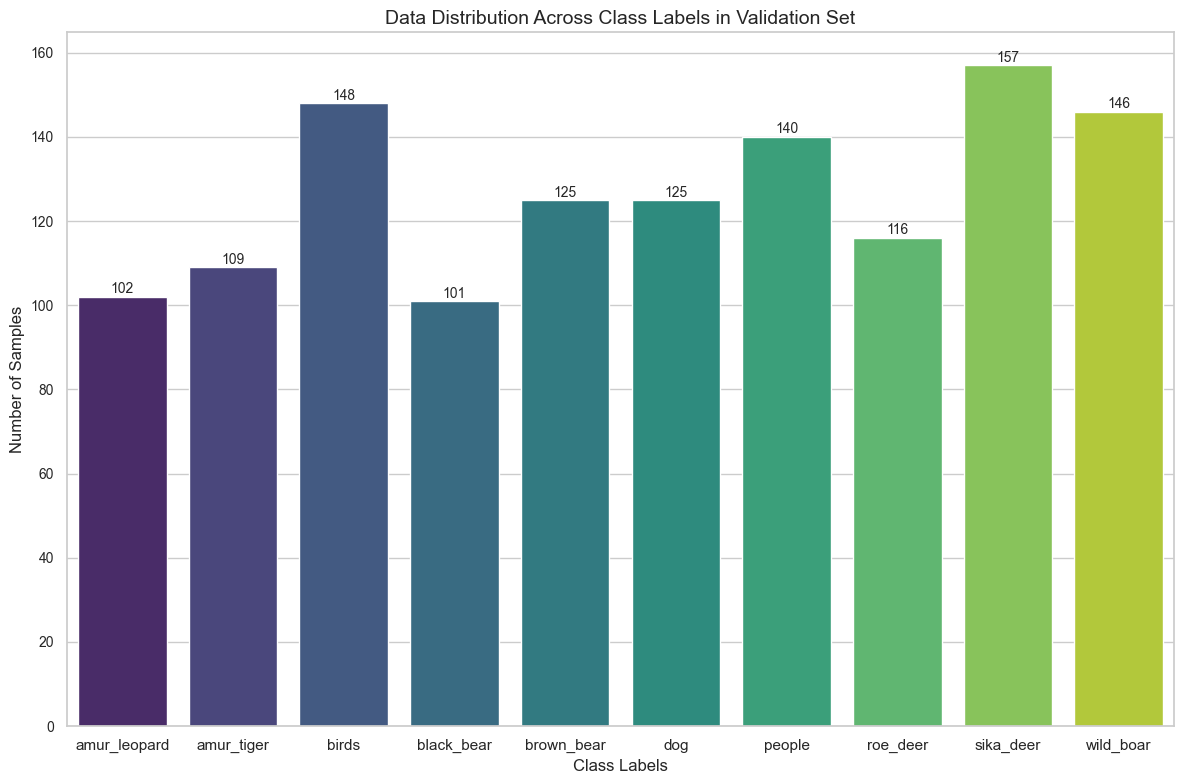

In [105]:
val_labels = val_dataset.img_labels['Label']

# # Count the number of samples in each class
class_counts_val = pd.Series(val_labels).value_counts().sort_index()
print(class_counts_val)

# Set a stylish Seaborn theme
sns.set(style="whitegrid")

# Plot the data distribution with Seaborn
plt.figure(figsize=(12, 8))
plot = sns.barplot(x=class_labels, y=class_counts_val, palette="viridis")  # Use a different color palette if needed

# Add annotations (labels) on top of the bars
for i, count in enumerate(class_counts_val):
    plot.text(i, count + 0.1, f"{count}", ha="center", va="bottom", fontsize=10)

# Adjust the plot appearance
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Data Distribution Across Class Labels in Validation Set', fontsize=14)
# plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust font size for y-axis ticks

# Force integer ticks on the y-axis
plot.yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.tight_layout()  # Ensure tight layout to avoid cropping labels
plt.show()


Weights and Biases

In [12]:
%env WANDB_API_KEY=36211d4c57d40dc9cc1897b2de903a25cbb2fc13

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


env: WANDB_API_KEY=36211d4c57d40dc9cc1897b2de903a25cbb2fc13


wandb: Currently logged in as: niharika21545. Use `wandb login --relogin` to force relogin


True

In [16]:
hyperparameter_defaults = dict(
    dropout = 0.5,
    channels_one = 32,
    channels_two = 64,
    channels_three = 128,
    batch_size = 32,
    learning_rate = 0.001,
    epochs = 10,
    )

wandb.init(config=hyperparameter_defaults, project="Project_test_4", name = "Russian_wildlife")

# access all HPs through wandb.config
config = wandb.config

Train and Valildation and Test dataloader

In [108]:
train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=True)

CNN Architechture

CNN from scratch

In [17]:
class cnn(nn.Module):
  def __init__(self, num_classes=10):
    super(cnn, self).__init__()

    # (W-f+2p)/s + 1

    # layer 1
    self.conv1=nn.Conv2d(in_channels=3, out_channels=config.channels_one, kernel_size=3, stride=1, padding=1)
    self.bn1=nn.BatchNorm2d(num_features=config.channels_one)
    self.relu1=nn.ReLU()

    # pooling layer 1
    self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)


    # layer 2
    self.conv2=nn.Conv2d(in_channels=config.channels_one, out_channels=config.channels_two, kernel_size=3, stride=1, padding=1)
    self.relu2=nn.ReLU()

    # pooling layer 2
    self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

    # layer 3
    self.conv3=nn.Conv2d(in_channels=config.channels_two, out_channels=config.channels_three, kernel_size=3, stride=1, padding=1)
    self.bn3=nn.BatchNorm2d(num_features=config.channels_three)
    self.relu3=nn.ReLU()

    # pooling layer 3
    self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

    self.dropout = nn.Dropout(p=config.dropout)

    self.fc= nn.Linear(in_features=128*12*12, out_features=num_classes)

    # Forward function
  def forward(self, input):
    output = self.conv1(input)
    output = self.bn1(output)
    output = self.relu1(output)

    output = self.pool1(output)

    output = self.conv2(output)
    output = self.relu2(output)

    output = self.pool2(output)

    output = self.conv3(output)
    output = self.bn3(output)
    output = self.relu3(output)

    output = self.pool3(output)

    output = output.view(-1, 128*12*12)

    output = self.fc(output)

    return output

Cross Entropy and Adam optimizer

In [18]:


device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = cnn()
model.to(device)

#track gradients
# wandb.watch(model)
#loss
criterion = nn.CrossEntropyLoss()
# Tell wandb to watch what the model gets up to: gradients, weights, and more!
wandb.watch(model, criterion, log="all", log_freq=10)

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)

print(model)

cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=18432, out_features=10, bias=True)
)


In [19]:

def model_parameters_table(model):
    table = PrettyTable(["Layer", "Parameter Count"])

    total_params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            num_params = param.numel()
            total_params += num_params
            table.add_row([name, num_params])

    table.add_row(["Total", total_params])
    return table

print(model_parameters_table(model))

+--------------+-----------------+
|    Layer     | Parameter Count |
+--------------+-----------------+
| conv1.weight |       864       |
|  conv1.bias  |        32       |
|  bn1.weight  |        32       |
|   bn1.bias   |        32       |
| conv2.weight |      18432      |
|  conv2.bias  |        64       |
| conv3.weight |      73728      |
|  conv3.bias  |       128       |
|  bn3.weight  |       128       |
|   bn3.bias   |       128       |
|  fc.weight   |      184320     |
|   fc.bias    |        10       |
|    Total     |      277898     |
+--------------+-----------------+


In [112]:

# def Train_model(model):
#   wandb.init(config=hyperparameter_defaults, project="Project_test_!", name = "Russian_wildlife")
#   wandb.watch(model)
#   iter = 0
#   total_loss_train = []
#   total_loss_validation = []
#   # tell wandb to get started
#   for epoch in range(config.epochs):
#     for i, (images, labels) in enumerate(train_dataloader):

#         batch_loss_train=0
#         batch_loss_val=0
#         num_batches = 0
#         # print(images)
#         # print(labels)
#         images =  images.to(device)
#         labels = torch.tensor([labels_map[label] for label in labels])
#         labels=torch.tensor(labels).to(device)

#         # Clear gradients w.r.t. parameters
#         optimizer.zero_grad()

#         # Forward pass to get output/logits
#         outputs = model(images)

#         # Calculate Loss: softmax --> cross entropy loss
#         loss = criterion(outputs, labels)

#         # Getting gradients w.r.t. parameters
#         loss.backward()

#         # Updating parameters
#         optimizer.step()

#         batch_loss_train+=loss.item()

#         iter += 1
#         num_batches+=1

#         if iter % 100 == 0:
#             # Calculate Accuracy
#             correct = 0.0
#             correct_arr = [0.0] * 10
#             total = 0.0
#             total_arr = [0.0] * 10

#             # Iterate through test dataset
#             for images, labels in test_dataloader:
#                 images = Variable(images)
#                 images =  images.to(device)
#                 labels = torch.tensor([labels_map[label] for label in labels])
#                 labels=torch.tensor(labels).to(device)

#                 # Forward pass only to get logits/output
#                 outputs = model(images)

#                 # Get predictions from the maximum value
#                 _, predicted = torch.max(outputs.data, 1)

#                 # Total number of labels
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum()
#                 loss_test = criterion(outputs, labels)
#                 for label in range(10):
#                     correct_arr[label] += (((predicted == labels) & (labels==label)).sum())
#                     total_arr[label] += (labels == label).sum()

#             accuracy = correct / total

#             metrics = {'accuracy': accuracy, 'loss_train': loss, 'loss_test': loss_test}
#             for label in range(10):
#                 metrics['Accuracy ' + labels_name[label]] = correct_arr[label] / total_arr[label]   #tells wand to log the metrics defined earlier
#             wandb.log(metrics)
#             print('Iteration: {0} Loss_train: {1:.2f} Loss_test: {1:.2f} Accuracy: {2:.2f}'.format(iter, loss,loss_test, accuracy))

#             # Print Loss
#             print('Iteration: {0} Loss_train: {1:.2f} Loss_test: {1:.2f} Accuracy: {2:.2f}'.format(iter, loss,loss_test, accuracy))

#     batch_loss_train/=num_batches
#     total_loss_train.append(batch_loss_train)

#     correct = 0
#     total = 0
#     count = 0
#     with torch.no_grad():

#       for data in val_dataloader:
#           # print("s")
#           images, labels = data
#           images =  images.to(device)
#           labels = torch.tensor([labels_map[label] for label in labels])
#           labels=torch.tensor(labels).to(device)
#           outputs = model(images)
#           total += labels.size(0)
#           loss_val = criterion(outputs, labels)

#           batch_loss_val += loss_val.item()
#           count+= 1

#       total_loss_validation += [batch_loss_val/count]
#       print("Validation loss is ",batch_loss_val/count)
#       wandb.log({"Validation loss": batch_loss_val/count})
#       print('Epoch: {} Loss: {} Validation Loss: {}'.format(epoch, batch_loss_train, batch_loss_val/count))
      
#     wandb.finish()
  

# Train_model(model)

In [113]:
for img, label in train_dataloader:
    print(img.shape)
    print(label)
    break

torch.Size([32, 3, 200, 200])
('brown_bear', 'brown_bear', 'birds', 'amur_tiger', 'sika_deer', 'amur_leopard', 'amur_tiger', 'black_bear', 'roe_deer', 'people', 'roe_deer', 'sika_deer', 'dog', 'amur_tiger', 'brown_bear', 'amur_tiger', 'black_bear', 'wild_boar', 'dog', 'people', 'people', 'birds', 'roe_deer', 'wild_boar', 'roe_deer', 'dog', 'amur_leopard', 'amur_leopard', 'wild_boar', 'roe_deer', 'birds', 'sika_deer')


Training and Validation

In [121]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import wandb
from tqdm import tqdm

def validate_model_wandb(model, val_loader, loss_module, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for data_inputs, data_labels in val_loader:
            data_inputs = data_inputs.to(device)
            data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            preds = model(data_inputs)
            loss = loss_module(preds, data_labels)

            total_loss += loss.item()
            _, predicted = torch.max(preds.data, 1)
            total_samples += data_labels.size(0)
            correct_predictions += (predicted == data_labels).sum().item()

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

def train_model_wandb(model, optimizer, train_loader, val_loader, loss_module, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize W&B run
    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name = "CNN")

    # Save gradients of your model
    wandb.watch(model, criterion)

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        # Training
        model.train()
        total_train_loss = 0.0
        for data_inputs, data_labels in train_loader:
            data_inputs = data_inputs.to(device)
            data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            optimizer.zero_grad()
            preds = model(data_inputs)
            loss = loss_module(preds, data_labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        average_train_loss = total_train_loss / len(train_loader)

        # Log training metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "train_loss_CNN": average_train_loss,
        })

        # Validation
        val_loss, val_accuracy = validate_model_wandb(model, val_loader, loss_module, device)

        # Log validation metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "val_loss_CNN": val_loss,
            "val_accuracy_CNN": val_accuracy,
        })

    # Mark the run as finished
    wandb.finish()

# train_model_wandb(model, optimizer, train_dataloader, loss_function)

# Assuming you have defined train_dataloader, val_dataloader, model, optimizer, and loss_function
train_model_wandb(model, optimizer, train_dataloader, val_dataloader, criterion, num_epochs=10)

100%|██████████| 10/10 [1:27:36<00:00, 525.69s/it]


Save and Load the model

In [77]:
state_dict = model.state_dict()
print(state_dict)

# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\model2.tar")

# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\model2.tar")

# Create a new model and load the state
new_model = cnn(num_classes=10).to(device)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

OrderedDict({'conv1.weight': tensor([[[[-0.0218,  0.0276, -0.1053],
          [-0.1563,  0.1239, -0.1008],
          [-0.0533, -0.0340, -0.0031]],

         [[-0.1330, -0.0046, -0.0682],
          [ 0.1624,  0.1655, -0.1377],
          [ 0.0420, -0.1781,  0.0793]],

         [[ 0.1866, -0.0161,  0.1685],
          [ 0.1467, -0.0417,  0.1160],
          [-0.1262,  0.1495, -0.1338]]],


        [[[-0.0686,  0.1564,  0.0849],
          [ 0.1584, -0.0566, -0.1810],
          [-0.1028, -0.0973,  0.1150]],

         [[-0.0251, -0.0539, -0.1174],
          [-0.1719,  0.1897, -0.0497],
          [-0.1821, -0.1776,  0.0936]],

         [[-0.0313, -0.1587,  0.0483],
          [-0.0865,  0.0299,  0.1333],
          [-0.0313, -0.0869,  0.1608]]],


        [[[-0.1274, -0.1856, -0.1649],
          [ 0.0376, -0.0131, -0.1076],
          [-0.1185,  0.1163,  0.0905]],

         [[-0.1671,  0.1065, -0.1135],
          [-0.0908, -0.0419, -0.1565],
          [-0.0965, -0.0906,  0.1536]],

         [[-0.0

Evaluation

In [123]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import torchvision

def visualize_misclassified(model, data_loader, device, labels_map):
    model.eval()
    misclassified_images = []
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)
            
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            misclassified_mask = pred_labels != data_labels
            misclassified_images.extend(list(zip(data_inputs[misclassified_mask], pred_labels[misclassified_mask])))
    
    return misclassified_images

def eval_model(model, data_loader, device, labels_map):
    model.eval()
    true_labels_list = []
    predicted_labels_list = []

    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name="CNN")
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            true_labels_list.extend(data_labels.cpu().numpy())
            predicted_labels_list.extend(pred_labels.cpu().numpy())

    true_labels = np.array(true_labels_list)
    predicted_labels = np.array(predicted_labels_list)

    # Calculate metrics
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy cnn: {acc:.4f}")
    print(f"F1 Score cnn: {f1:.4f}")
    print(f"Confusion Matrix cnn:\n{conf_matrix}")

    # Log metrics to WandB
    wandb.log({'accuracy cnn': acc, 'f1_score cnn': f1})
    wandb.log({'confusion_matrix cnn': wandb.plot.confusion_matrix(probs=None,
                                                                    y_true=true_labels,
                                                                    preds=predicted_labels,
                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

    # Save misclassified images
    misclassified_images = visualize_misclassified(model, data_loader, device, labels_map)
    for i, (image, pred_label) in enumerate(misclassified_images):
        # Save the misclassified image
        filename = f'misclassified_image_{i}_true_label_{true_labels[i]}_pred_label_{pred_label}.png'
        torchvision.utils.save_image(image, filename)

    return true_labels, predicted_labels

# Call the evaluation function
true_labels, predicted_labels = eval_model(model, test_dataloader, device, labels_map)


Accuracy cnn: 0.6526
F1 Score cnn: 0.6554
Confusion Matrix cnn:
[[156  14  11   1   1   5   2   5   0  11]
 [ 17 140   7   0   3  10  14  17   2  11]
 [ 10   6 200   4   4  15   1  33   4  24]
 [  2   0   4 123  40   8   3   8  12   6]
 [  3   2  11  37 148   8   5  17   9  13]
 [  5   4   8   6   7 126  14  65   3  16]
 [  4   4   3   0   3   9 148  56   3   6]
 [  2   2  14   3   4  19  25 224  10  17]
 [  2   1  12   7  24  12  12  25 199   3]
 [  3   2  12   1   2   9   4  30   3 219]]


Misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


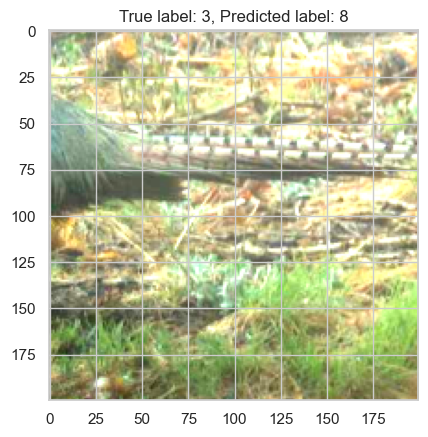

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


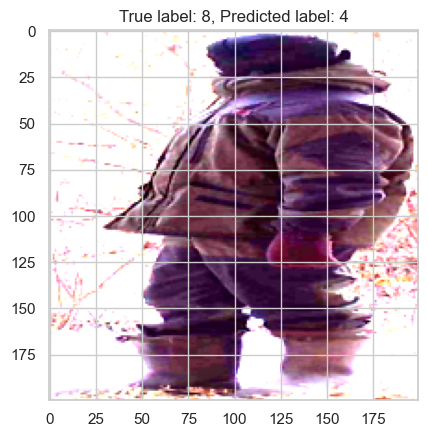

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


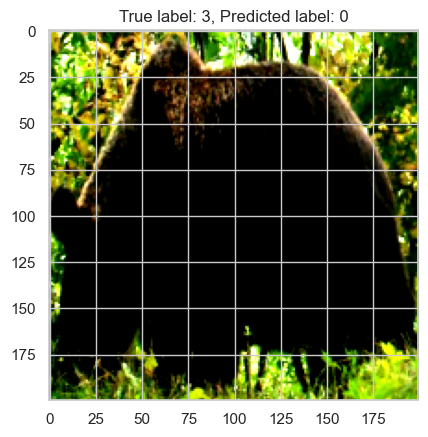

In [127]:
for i in range(4):
    # only plot where true label is not equal to the predicted label
    if true_labels[i] != predicted_labels[i]:
        plt.imshow(test_dataset[i][0].permute(1, 2, 0))
        plt.title(f"True label: {true_labels[i]}, Predicted label: {predicted_labels[i]}")
        plt.show()
    # plt.imshow(test_dataset[i][0].permute(1, 2, 0))
    # plt.title(f"True label: {true_labels[i]}, Predicted label: {predicted_labels[i]}")
    # plt.show()

In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# import wandb

# def eval_model(model, data_loader, device):
#     model.eval()  # Set model to eval mode
#     true_preds, num_preds = 0., 0.
#     tp, tn, fp, fn = 0, 0, 0, 0  # Initialize counters for TP, TN, FP, FN

#     wandb.init(config=hyperparameter_defaults, project="Project_test_4", name = "CNN")
    
#     model.eval()
    
#     with torch.no_grad():
#         for data_inputs, data_labels in data_loader:

#             data_inputs = data_inputs.to(device)
#             data_labels  = torch.tensor([labels_map[label] for label in data_labels])
#             data_labels  = torch.tensor(data_labels).to(device)
#             preds = model(data_inputs)
#             preds = preds.squeeze(dim=1)
#             preds = torch.sigmoid(preds)
#             pred_labels = torch.argmax(preds, dim=1)
#             # print(f"pred_labels: {pred_labels}")
        
#         true_labels = data_labels.cpu().numpy()  # Convert to NumPy array
#         predicted_labels = pred_labels.cpu().numpy()  # Convert to NumPy array

#         # print(f"True labels: {true_labels}")
#         # print(f"Predicted labels: {predicted_labels}")
#         # add in csv
#         df = pd.DataFrame({'True Labels': true_labels, 'Predicted Labels': predicted_labels})
#         df.to_csv('D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\true_vs_predicted_labels.csv', index=False)

#         acc = accuracy_score(true_labels, predicted_labels)
#         f1 = f1_score(true_labels, predicted_labels, average='weighted')
#         conf_matrix = confusion_matrix(true_labels, predicted_labels)

#         print(f"Accuracy cnn: {acc:.4f}")
#         print(f"F1 Score cnn: {f1:.4f}")
#         print(f"Confusion Matrix cnn:\n{conf_matrix}")

#         # Log metrics to wandb
#         wandb.log({'accuracy cnn': acc, 'f1_score cnn': f1})
#         wandb.log({'confusion_matrix cnn': wandb.plot.confusion_matrix(probs=None,
#                                                                    y_true=true_labels,
#                                                                    preds=predicted_labels,
#                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})


# eval_model(model, test_dataloader, device)

Resnet 18 - Fine Tuning

In [20]:
# custom dataset class
class CustomImageDataset2(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        # converting image to PIL
        image = transforms.ToPILImage()(image)
        # converting numpy array to tensor
        if self.transform:
            image = self.transform(image)
        label = self.img_labels.iloc[idx, 1]
        return image, label


In [21]:
transform2 = transforms.Compose([transforms.Resize((200,200)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# tranform to dataloader
dataset_path = 'D:\CV_HW_1_QUES2_WILDLIFE_DATASET\Cropped_final'
train_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\train_dataset.csv'
val_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\val_dataset.csv'
test_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\test_dataset.csv'

train_dataset = CustomImageDataset2(annotations_file=train_data_path, img_dir=dataset_path, transform=transform2)
val_dataset = CustomImageDataset2(annotations_file=val_data_path, img_dir=dataset_path, transform=transform2)
test_dataset = CustomImageDataset2(annotations_file=test_data_path, img_dir=dataset_path, transform=transform2)

train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=True)

In [22]:
# check the shape of the dataset
print(train_dataset.__len__())
print(val_dataset.__len__())
print(test_dataset.__len__())

8977
1269
2579


In [23]:
train_dataset.__getitem__(0)

(tensor([[[-1.2617, -1.2788, -1.3815,  ..., -0.8335, -0.8335, -0.7822],
          [-1.1589, -1.1932, -1.3644,  ..., -0.7993, -0.8164, -0.7650],
          [-1.1075, -1.1247, -1.3130,  ..., -0.7993, -0.8164, -0.7822],
          ...,
          [-0.1314, -0.1999, -0.1314,  ..., -0.8678, -0.7137, -0.7137],
          [-0.0458, -0.0972, -0.0458,  ..., -0.6281, -0.6794, -0.6794],
          [-0.0629, -0.0801,  0.0227,  ..., -0.5767, -0.6109, -0.5767]],
 
         [[-1.1604, -1.1779, -1.2829,  ..., -0.7227, -0.7227, -0.6702],
          [-1.0553, -1.0903, -1.2654,  ..., -0.6877, -0.7052, -0.6527],
          [-1.0028, -1.0203, -1.2129,  ..., -0.6877, -0.7052, -0.6702],
          ...,
          [-0.0049, -0.0749, -0.0049,  ..., -0.7577, -0.6001, -0.6001],
          [ 0.0826,  0.0301,  0.0826,  ..., -0.5126, -0.5651, -0.5651],
          [ 0.0651,  0.0476,  0.1527,  ..., -0.4601, -0.4951, -0.4601]],
 
         [[-0.9330, -0.9504, -1.0550,  ..., -0.4973, -0.4973, -0.4450],
          [-0.8284, -0.8633,

In [24]:
X, y = next(iter(train_dataloader))

print(X.shape)

# print intensity pixel

print(X[0].min(), X[0].max())

torch.Size([32, 3, 200, 200])
tensor(-2.1008) tensor(2.6226)


(array([3.800e+01, 6.900e+01, 8.000e+01, 4.600e+01, 5.200e+01, 2.180e+02,
        7.220e+02, 1.464e+03, 1.470e+03, 2.780e+03, 2.408e+03, 3.801e+03,
        4.467e+03, 4.672e+03, 5.332e+03, 6.437e+03, 5.630e+03, 4.801e+03,
        5.899e+03, 5.405e+03, 3.381e+03, 4.349e+03, 4.146e+03, 3.793e+03,
        2.409e+03, 3.403e+03, 3.269e+03, 2.513e+03, 2.885e+03, 3.072e+03,
        2.777e+03, 2.569e+03, 2.758e+03, 2.316e+03, 1.843e+03, 2.248e+03,
        2.030e+03, 1.294e+03, 1.855e+03, 1.765e+03, 1.291e+03, 1.252e+03,
        1.330e+03, 1.008e+03, 8.310e+02, 7.970e+02, 6.190e+02, 4.420e+02,
        3.370e+02, 2.990e+02, 1.930e+02, 1.700e+02, 1.470e+02, 9.900e+01,
        8.900e+01, 6.400e+01, 6.500e+01, 3.100e+01, 3.200e+01, 3.600e+01,
        2.700e+01, 2.100e+01, 2.300e+01, 2.500e+01, 1.300e+01, 1.600e+01,
        1.700e+01, 1.000e+01, 7.000e+00, 1.100e+01, 9.000e+00, 1.200e+01,
        9.000e+00, 5.000e+00, 1.100e+01, 1.100e+01, 5.000e+00, 1.000e+01,
        1.000e+01, 7.000e+00, 8.000e+0

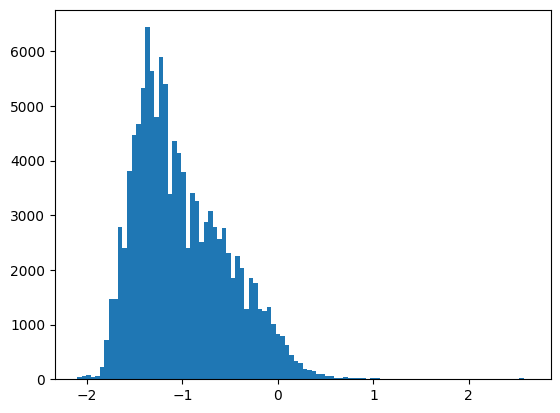

In [25]:

# histogram of data
plt.hist(X[0].numpy().flatten(), bins=100)

In [26]:
Xv, yv = next(iter(val_dataloader))

print(Xv.shape)

# print intensity pixel

print(Xv[0].min(), X[0].max())

torch.Size([32, 3, 200, 200])
tensor(-1.8782) tensor(2.6226)


(array([7.000e+00, 9.100e+01, 1.720e+02, 6.440e+02, 1.075e+03, 1.202e+03,
        1.389e+03, 1.572e+03, 1.222e+03, 9.800e+02, 1.357e+03, 1.334e+03,
        1.901e+03, 1.245e+03, 1.769e+03, 1.727e+03, 1.123e+03, 1.694e+03,
        1.145e+03, 1.727e+03, 1.452e+03, 1.620e+03, 1.888e+03, 1.609e+03,
        1.809e+03, 1.569e+03, 1.827e+03, 1.735e+03, 1.724e+03, 1.765e+03,
        1.488e+03, 1.996e+03, 1.315e+03, 1.926e+03, 1.596e+03, 1.734e+03,
        1.960e+03, 1.373e+03, 1.995e+03, 1.886e+03, 1.738e+03, 2.062e+03,
        2.104e+03, 2.074e+03, 1.960e+03, 2.273e+03, 2.171e+03, 2.167e+03,
        1.914e+03, 2.262e+03, 2.475e+03, 1.916e+03, 2.231e+03, 1.923e+03,
        2.194e+03, 2.146e+03, 1.763e+03, 2.326e+03, 1.935e+03, 1.759e+03,
        1.933e+03, 1.509e+03, 1.704e+03, 1.876e+03, 1.309e+03, 1.431e+03,
        1.186e+03, 1.094e+03, 1.035e+03, 9.240e+02, 1.006e+03, 7.260e+02,
        6.900e+02, 6.310e+02, 5.450e+02, 5.330e+02, 3.470e+02, 4.290e+02,
        3.390e+02, 2.680e+02, 2.190e+0

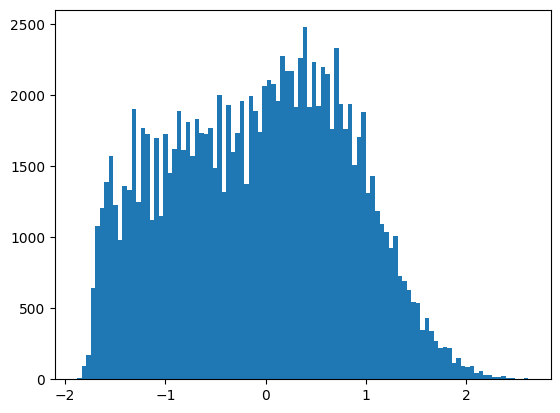

In [27]:
# histogram of data
plt.hist(Xv[0].numpy().flatten(), bins=100)

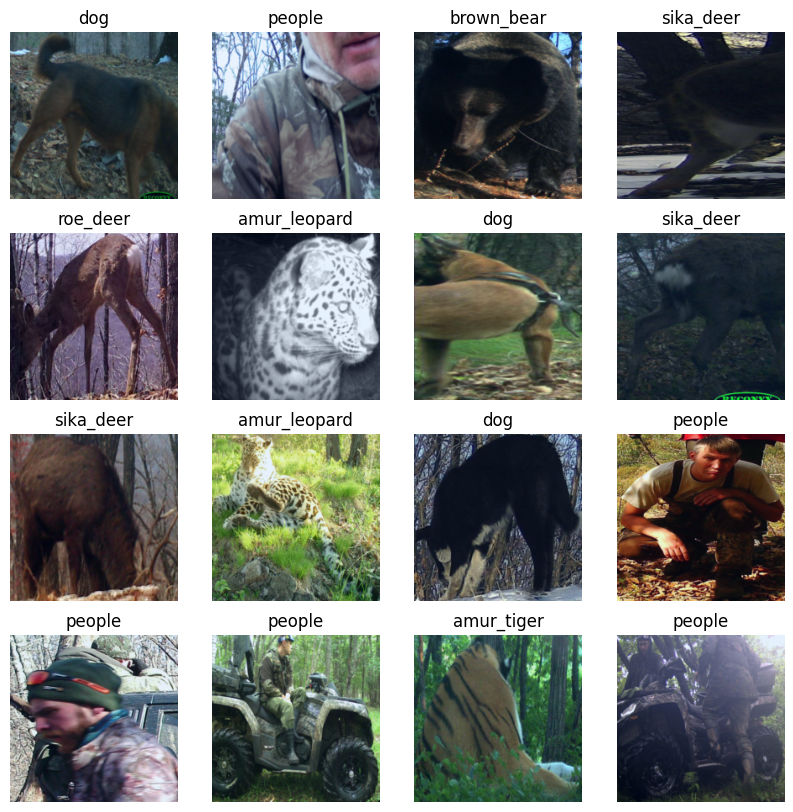

In [28]:
# plot for several images

fig, axs = plt.subplots(4,4, figsize=(10, 10))

for (i, ax) in enumerate(axs.flatten()):
    pic = X[i].numpy().transpose((1, 2, 0))
    pic = pic-np.min(pic)
    pic = pic/np.max(pic)

    label = y[i]

    ax.imshow(pic)
    ax.set_title(label)
    ax.axis('off')

plt.show()


Import and inspect resnet model

In [29]:
resnet = torchvision.models.resnet18(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [30]:
# freeze the layers
for param in resnet.parameters():
    param.requires_grad = False
    

In [31]:
# modify the last layer
resnet.fc = nn.Linear(in_features=512, out_features=10)

In [32]:
# loss and optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001)

Train and Validation

In [33]:
# train the model
def validate_model_wandb(model, val_loader, loss_module, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for data_inputs, data_labels in val_loader:
            data_inputs = data_inputs.to(device)
            data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            preds = model(data_inputs)
            loss = loss_module(preds, data_labels)

            total_loss += loss.item()
            _, predicted = torch.max(preds.data, 1)
            total_samples += data_labels.size(0)
            correct_predictions += (predicted == data_labels).sum().item()

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

def train_model(model, loss_function, optimizer, train_loader, val_loader, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize W&B run
    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name = "resnet")

    # Save gradients of your model
    wandb.watch(model, criterion, log="all", log_freq=10)

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        # Training
        model.train()
        total_train_loss = 0.0
        for data_inputs, data_labels in train_loader:
            data_inputs = data_inputs.to(device)
            data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            optimizer.zero_grad()
            preds = model(data_inputs)
            loss = loss_function(preds, data_labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        average_train_loss = total_train_loss / len(train_loader)

        # Log training metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "train_loss resnet": average_train_loss,
        })

        # Validation
        val_loss, val_accuracy = validate_model_wandb(model, val_loader, loss_function, device)

        # Log validation metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "val_loss resnet": val_loss,
            "val_accuracy resnet": val_accuracy,
        })

    # Mark the run as finished
    wandb.finish()

train_model(resnet, lossfun, optimizer, train_dataloader, val_dataloader, num_epochs=10)

100%|██████████| 10/10 [1:36:48<00:00, 580.83s/it]


Evaluation

In [34]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import torchvision

def visualize_misclassified(model, data_loader, device, labels_map):
    model.eval()
    misclassified_images = []
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)
            
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            misclassified_mask = pred_labels != data_labels
            misclassified_images.extend(list(zip(data_inputs[misclassified_mask], pred_labels[misclassified_mask])))
    
    return misclassified_images

def eval_model(model, data_loader, device, labels_map):
    model.eval()
    true_labels_list = []
    predicted_labels_list = []

    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name="resnet")
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            true_labels_list.extend(data_labels.cpu().numpy())
            predicted_labels_list.extend(pred_labels.cpu().numpy())

    true_labels = np.array(true_labels_list)
    predicted_labels = np.array(predicted_labels_list)

    # Calculate metrics
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy resnet: {acc:.4f}")
    print(f"F1 Score resnet: {f1:.4f}")
    print(f"Confusion Matrix resnet:\n{conf_matrix}")

    # Log metrics to WandB
    wandb.log({'accuracy resnet': acc, 'f1_score resnet': f1})
    wandb.log({'confusion_matrix resnet': wandb.plot.confusion_matrix(probs=None,
                                                                    y_true=true_labels,
                                                                    preds=predicted_labels,
                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

    # Save misclassified images
    misclassified_images = visualize_misclassified(model, data_loader, device, labels_map)
    for i, (image, pred_label) in enumerate(misclassified_images):
        # Save the misclassified image
        filename = f'resnet_misclassified_image_{i}_true_label_{true_labels[i]}_pred_label_{pred_label}.png'
        torchvision.utils.save_image(image, filename)

    return true_labels, predicted_labels

# Call the evaluation function
true_labels_resnet, predicted_labels_resnet = eval_model(resnet, test_dataloader, device, labels_map)


Accuracy resnet: 0.8019
F1 Score resnet: 0.8005
Confusion Matrix resnet:
[[188   4   7   0   1   4   1   1   0   0]
 [  3 195   3   1   3   2   1   3   7   3]
 [  2   6 267   0   1   8   2   8   4   3]
 [  0   0   4 142  47   1   0   1   8   3]
 [  0   3   2  34 188  11   0   3  11   1]
 [  2   5  10   5  11 185   4  18   8   6]
 [  2   1   4   0   5  15 143  45  15   6]
 [  1   4   8   1   7   5  15 247  20  12]
 [  0   4  10   5   8   6   1   9 253   1]
 [  0   2   8   0   1   5   0   8   1 260]]


In [35]:
# import torch
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# import wandb

# def eval_model(model, data_loader, device):
#     model.eval()  # Set model to eval mode

#     wandb.init(config=hyperparameter_defaults, project="Project_test_3", name = "resnet")
    
#     model.eval()
    
#     with torch.no_grad():
#         for data_inputs, data_labels in data_loader:

#             data_inputs = data_inputs.to(device)
#             data_labels  = torch.tensor([labels_map[label] for label in data_labels])
#             data_labels  = torch.tensor(data_labels).to(device)
#             preds = model(data_inputs)
#             preds = preds.squeeze(dim=1)
#             preds = torch.sigmoid(preds)
#             pred_labels = torch.argmax(preds, dim=1)
#             # print(f"pred_labels: {pred_labels}")
        
#         true_labels = data_labels.cpu().numpy()  # Convert to NumPy array
#         predicted_labels = pred_labels.cpu().numpy()  # Convert to NumPy array

#         # print(f"True labels: {true_labels}")
#         # print(f"Predicted labels: {predicted_labels}")
#         # add in csv

#         acc = accuracy_score(true_labels, predicted_labels)
#         f1 = f1_score(true_labels, predicted_labels, average='weighted')
#         conf_matrix = confusion_matrix(true_labels, predicted_labels)

#         print(f"Accuracy: {acc:.4f}")
#         print(f"F1 Score: {f1:.4f}")
#         print(f"Confusion Matrix:\n{conf_matrix}")

#         # Log metrics to wandb
#         wandb.log({'accuracy': acc, 'f1_score': f1})
#         wandb.log({'confusion_matrix': wandb.plot.confusion_matrix(probs=None,
#                                                                    y_true=true_labels,
#                                                                    preds=predicted_labels,
#                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})


# eval_model(resnet, test_dataloader, device)

In [36]:
import torch
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Feature Extraction

In [37]:
# Remove the final fully connected layer to get feature vectors
backbone = torch.nn.Sequential(*list(resnet.children())[:-1])

In [38]:
def extract_features(loader, model):
    model.eval()
    feature_vectors = []
    labels_ = []
    with torch.no_grad():
        for inputs, targets in loader:
            features = model(inputs)
            targets = torch.tensor([labels_map[label] for label in targets])
            feature_vectors.append(features.squeeze())
            labels_.extend(targets)
    return torch.cat(feature_vectors, dim=0), torch.tensor(labels_)

# Extract feature vectors for train and validation sets
train_features, train_labels = extract_features(train_dataloader, backbone)
val_features, val_labels = extract_features(val_dataloader, backbone)

tSNE

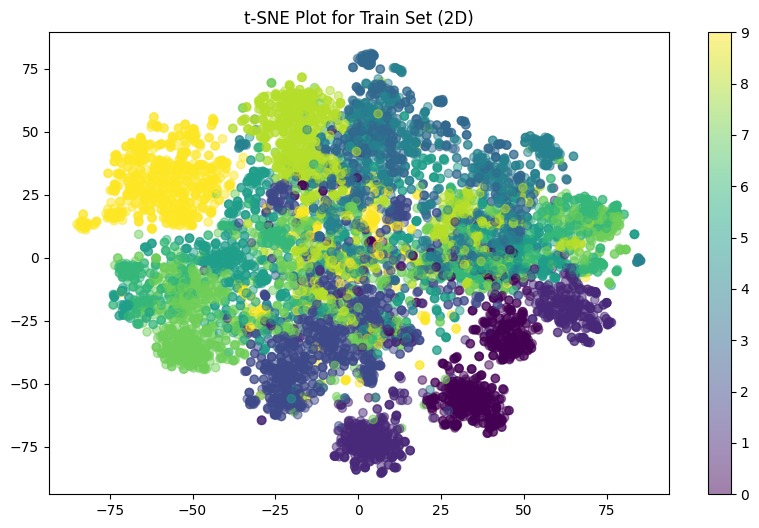

In [39]:
# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
train_features_tsne = tsne.fit_transform(train_features)
val_features_tsne = tsne.fit_transform(val_features)

# Plot t-SNE in 2D for train set
plt.figure(figsize=(10, 6))
plt.scatter(train_features_tsne[:, 0], train_features_tsne[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot for Train Set (2D)')
plt.colorbar()
plt.show()


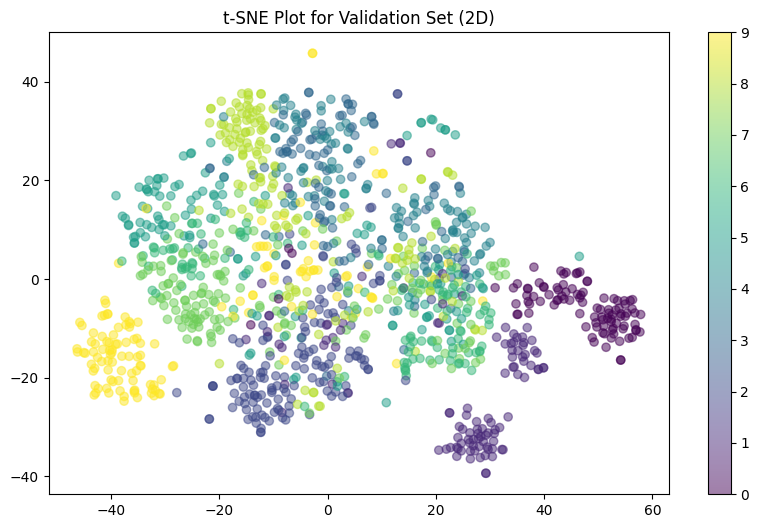

In [40]:
# plot t-SNE in 2D for validation set
plt.figure(figsize=(10, 6))
plt.scatter(val_features_tsne[:, 0], val_features_tsne[:, 1], c=val_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot for Validation Set (2D)')
plt.colorbar()
plt.show()

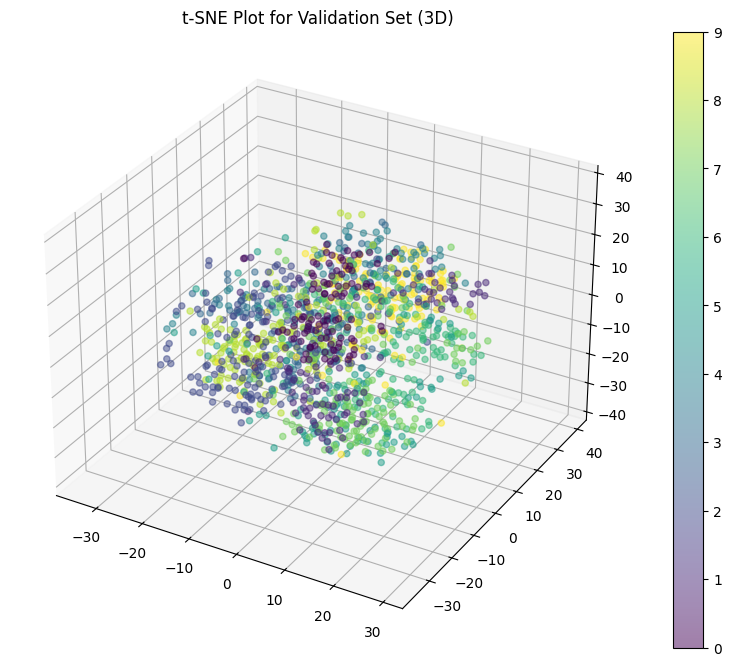

In [41]:
# Plot t-SNE in 3D for validation set
tsne_3d = TSNE(n_components=3, random_state=42)
val_features_tsne_3d = tsne_3d.fit_transform(val_features)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(val_features_tsne_3d[:, 0], val_features_tsne_3d[:, 1], val_features_tsne_3d[:, 2], c=val_labels, cmap='viridis', alpha=0.5)
ax.set_title('t-SNE Plot for Validation Set (3D)')
fig.colorbar(scatter)
plt.show()

Data Augmentation

In [42]:
# data_path = 'D:\CV_HW_1_QUES2_WILDLIFE_DATASET\Cropped_final'

# # Create a dataset from the image folder
# dataset = datasets.ImageFolder(data_path)

# # csv file path
# csv_file_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\new_wildlife_dataset.csv'

# # Write the data to the CSV file
# with open(csv_file_path, 'w', newline='') as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerow(['Image_Path', 'Label'])  # Header
#     csv_writer.writerows(dataset.samples)

In [43]:
# # split the dataset into train, validation, and test sets

# # # Split the data into train, val, and test sets with stratification

# train_df, temp_df = train_test_split(dataset.samples, test_size=0.3, stratify=dataset.targets, random_state=32, shuffle=True)
# val_df, test_df = train_test_split(temp_df, test_size=0.67, stratify=np.array(temp_df)[:, 1], random_state=32, shuffle=True)

# # change them into dataframes
# train_df = pd.DataFrame(train_df, columns=['Image_Path', 'Label'])
# val_df = pd.DataFrame(val_df, columns=['Image_Path', 'Label'])
# test_df = pd.DataFrame(test_df, columns=['Image_Path', 'Label'])


# # Save the split datasets to new CSV files if needed
# train_df.to_csv('new_train_dataset.csv', index=False)
# val_df.to_csv('new_val_dataset.csv', index=False)
# test_df.to_csv('new_test_dataset.csv', index=False)

In [44]:
new_train_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\new_train_dataset.csv'
new_val_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\new_val_dataset.csv'
new_test_data_path = 'D:\\CV_HW_1_QUES2_WILDLIFE_DATASET\\new_test_dataset.csv'

Data Augmentation Techniques

* Horizontal Flip
* Vertical Flip
* Random Rotation
* Random Crop
* Color Jitter

In [53]:
train_tfms = transforms.Compose([transforms.Resize((200,200)), 
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomVerticalFlip(),
                                 transforms.RandomCrop(200, pad_if_needed=True, padding_mode='reflect'),
                                 transforms.RandomRotation(10),
                                 transforms.ColorJitter(contrast=0.5, saturation=0.5),
                                 transforms.ToTensor(), 
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


val_tfms = transforms.Compose([transforms.Resize((200,200)),transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [55]:
# create custom dataset 1
new_train_dataset = CustomImageDataset2(annotations_file=new_train_data_path, img_dir=dataset_path, transform=train_tfms)
new_val_dataset = CustomImageDataset2(annotations_file=new_val_data_path, img_dir=dataset_path, transform=val_tfms)
new_test_dataset = CustomImageDataset2(annotations_file=new_test_data_path, img_dir=dataset_path, transform=val_tfms)

In [56]:
# dataloaders
new_train_dataloader = DataLoader(new_train_dataset, batch_size=config.batch_size, shuffle=True)
new_val_dataloader = DataLoader(new_val_dataset, batch_size=config.batch_size, shuffle=True)
new_test_dataloader = DataLoader(new_test_dataset, batch_size=config.batch_size, shuffle=True)

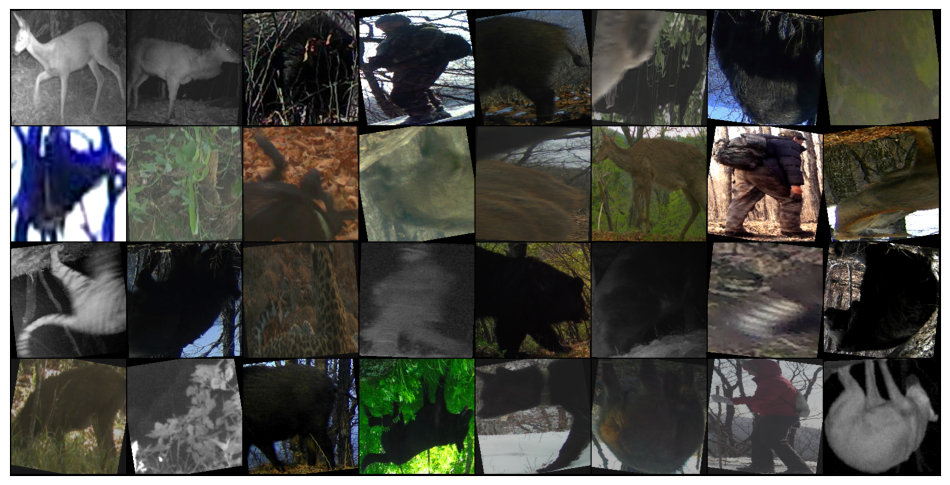

In [57]:
# import make_grid
from torchvision.utils import make_grid

stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
def denormalize(image):
    mean = torch.tensor([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)
    return image*std + mean

# plot for several images
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

show_batch(new_train_dataloader)

In [61]:
class cnn(nn.Module):
  def __init__(self, num_classes=10):
    super(cnn, self).__init__()

    # (W-f+2p)/s + 1

    # layer 1
    self.conv1=nn.Conv2d(in_channels=3, out_channels=config.channels_one, kernel_size=3, stride=1, padding=1)
    self.bn1=nn.BatchNorm2d(num_features=config.channels_one)
    self.relu1=nn.ReLU()

    # pooling layer 1
    self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)


    # layer 2
    self.conv2=nn.Conv2d(in_channels=config.channels_one, out_channels=config.channels_two, kernel_size=3, stride=1, padding=1)
    self.relu2=nn.ReLU()

    # pooling layer 2
    self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

    # layer 3
    self.conv3=nn.Conv2d(in_channels=config.channels_two, out_channels=config.channels_three, kernel_size=3, stride=1, padding=1)
    self.bn3=nn.BatchNorm2d(num_features=config.channels_three)
    self.relu3=nn.ReLU()

    # pooling layer 3
    self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

    self.dropout = nn.Dropout(p=config.dropout)

    self.fc= nn.Linear(in_features=config.channels_three*12*12, out_features=num_classes)

    # Forward function
  def forward(self, input):
    output = self.conv1(input)
    output = self.bn1(output)
    output = self.relu1(output)

    output = self.pool1(output)

    output = self.conv2(output)
    output = self.relu2(output)

    output = self.pool2(output)

    output = self.conv3(output)
    output = self.bn3(output)
    output = self.relu3(output)

    output = self.pool3(output)

    output = output.view(-1, config.channels_three*12*12)

    output = self.fc(output)

    return output

    return output

device = "cuda:0" if torch.cuda.is_available() else "cpu"
modelaug = cnn()
modelaug.to(device)

#track gradients
# wandb.watch(model)
#loss
criterion = nn.CrossEntropyLoss()
# Tell wandb to watch what the model gets up to: gradients, weights, and more!
wandb.watch(modelaug, criterion, log="all", log_freq=10)

#optimizer
optimizer = torch.optim.Adam(modelaug.parameters(), lr=config.learning_rate)

print(modelaug)

cnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=18432, out_features=10, bias=True)
)


In [62]:



def validate_model_wandb(model, val_loader, loss_module, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for data_inputs, data_labels in val_loader:
            data_inputs = data_inputs.to(device)
            # data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            preds = model(data_inputs)
            loss = loss_module(preds, data_labels)

            total_loss += loss.item()
            _, predicted = torch.max(preds.data, 1)
            total_samples += data_labels.size(0)
            correct_predictions += (predicted == data_labels).sum().item()

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# train the model
def train_model(model, loss_function, optimizer, train_loader, val_loader, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize W&B run
    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name = "aug")

    # Save gradients of your model
    wandb.watch(model, criterion, log="all", log_freq=10)

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        # Training
        model.train()
        total_train_loss = 0.0
        for data_inputs, data_labels in train_loader:
            data_inputs = data_inputs.to(device)
            # data_labels  = torch.tensor([labels_map[label] for label in data_labels])
            data_labels  = torch.tensor(data_labels).to(device)

            optimizer.zero_grad()
            preds = model(data_inputs)
            loss = loss_function(preds, data_labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        average_train_loss = total_train_loss / len(train_loader)

        # Log training metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": average_train_loss,
        })

        # Validation
        val_loss, val_accuracy = validate_model_wandb(model, val_loader, loss_function, device)

        # Log validation metrics to WandB
        wandb.log({
            "epoch": epoch + 1,
            "val_loss aug": val_loss,
            "val_accuracy aug": val_accuracy,
        })

    # Mark the run as finished
    wandb.finish()

train_model(modelaug, lossfun, optimizer, new_train_dataloader, new_val_dataloader, num_epochs=10)

100%|██████████| 10/10 [2:06:43<00:00, 760.37s/it] 


In [65]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import torchvision

def visualize_misclassified(model, data_loader, device, labels_map):
    model.eval()
    misclassified_images = []
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            # data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)
            
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            misclassified_mask = pred_labels != data_labels
            misclassified_images.extend(list(zip(data_inputs[misclassified_mask], pred_labels[misclassified_mask])))
    
    return misclassified_images

def eval_model(model, data_loader, device, labels_map):
    model.eval()
    true_labels_list = []
    predicted_labels_list = []

    wandb.init(config=hyperparameter_defaults, project="Project_test_4", name="aug")
    
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            # data_labels = torch.tensor([labels_map[label] for label in data_labels])
            data_labels = data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = torch.argmax(preds, dim=1)

            true_labels_list.extend(data_labels.cpu().numpy())
            predicted_labels_list.extend(pred_labels.cpu().numpy())

    true_labels = np.array(true_labels_list)
    predicted_labels = np.array(predicted_labels_list)

    # Calculate metrics
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy aug: {acc:.4f}")
    print(f"F1 Score aug: {f1:.4f}")
    print(f"Confusion Matrix aug:\n{conf_matrix}")

    # Log metrics to WandB
    wandb.log({'accuracy aug': acc, 'f1_score aug': f1})
    wandb.log({'confusion_matrix aug': wandb.plot.confusion_matrix(probs=None,
                                                                    y_true=true_labels,
                                                                    preds=predicted_labels,
                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

    # Save misclassified images
    misclassified_images = visualize_misclassified(model, data_loader, device, labels_map)
    for i, (image, pred_label) in enumerate(misclassified_images):
        # Save the misclassified image
        filename = f'aug_misclassified_image_{i}_true_label_{true_labels[i]}_pred_label_{pred_label}.png'
        torchvision.utils.save_image(image, filename)

    return true_labels, predicted_labels

# Call the evaluation function
true_labels_aug, predicted_labels_aug = eval_model(modelaug, new_test_dataloader, device, labels_map)


Accuracy aug: 0.5921
F1 Score aug: 0.6010
Confusion Matrix aug:
[[148  23   3   6   6   1   2   5  11   1]
 [ 19 126   3   8   6  10   6  11  31   1]
 [ 10  12 189  10  22  16  10   3  22   7]
 [  0   3   0 157  35   2   0   1   6   2]
 [  2  11   0  90 125   5   3   3   4  10]
 [  0  10  11  23  35 102   2  17  48   6]
 [  4   5  13   7  14  13 191   4  31   3]
 [  1  14   0  14  12  12   2 119  58   4]
 [  4  14   4  21  22  18   7  30 196   4]
 [  0   5   0  26  53   9   1   9  20 174]]


In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# import wandb

# def eval_model(model, data_loader, device):
#     model.eval()  # Set model to eval mode

#     wandb.init(config=hyperparameter_defaults, project="Project_test_3", name = "aug")
    
#     model.eval()
    
#     with torch.no_grad():
#         for data_inputs, data_labels in data_loader:

#             data_inputs = data_inputs.to(device)
#             # data_labels  = torch.tensor([labels_map[label] for label in data_labels])
#             data_labels  = torch.tensor(data_labels).to(device)
#             preds = model(data_inputs)
#             preds = preds.squeeze(dim=1)
#             preds = torch.sigmoid(preds)
#             pred_labels = torch.argmax(preds, dim=1)
#             # print(f"pred_labels: {pred_labels}")
        
#         true_labels = data_labels.cpu().numpy()  # Convert to NumPy array
#         predicted_labels = pred_labels.cpu().numpy()  # Convert to NumPy array

#         # print(f"True labels: {true_labels}")
#         # print(f"Predicted labels: {predicted_labels}")
#         # add in csv

#         acc = accuracy_score(true_labels, predicted_labels)
#         f1 = f1_score(true_labels, predicted_labels, average='weighted')
#         conf_matrix = confusion_matrix(true_labels, predicted_labels)

#         print(f"Accuracy: {acc:.4f}")
#         print(f"F1 Score: {f1:.4f}")
#         print(f"Confusion Matrix:\n{conf_matrix}")

#         # Log metrics to wandb
#         wandb.log({'accuracy': acc, 'f1_score': f1})
#         wandb.log({'confusion_matrix_aug': wandb.plot.confusion_matrix(probs=None,
#                                                                    y_true=true_labels,
#                                                                    preds=predicted_labels,
#                                                                    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})


# eval_model(model, new_test_dataloader, device)

Misclassified euclidean distance

In [ ]:
model = torch.nn.Sequential(*(list(new_model.children())[:-2]))

In [ ]:
classes_data = {}
for tensor, label in train_dataset_:
    # Convert label to index
    label_index = labels_map[label]

    if label_index not in classes_data:
        classes_data[label_index] = []

    classes_data[label_index].append(tensor)

In [ ]:
# Calculate centroid for each class
centroids = {}
for class_index, class_tensors in classes_data.items():
    class_tensors = torch.stack(class_tensors)
    class_centroid = torch.mean(class_tensors, dim=0)
    centroids[class_index] = class_centroid

print("Centroids:", centroids)

Centroids: {5: tensor([[[0.6743, 0.6669, 0.6720,  ..., 0.6608, 0.6650, 0.6729],
         [0.6618, 0.6630, 0.6763,  ..., 0.6573, 0.6650, 0.6743],
         [0.6588, 0.6637, 0.6775,  ..., 0.6497, 0.6610, 0.6681],
         ...,
         [0.8422, 0.8491, 0.8464,  ..., 0.8410, 0.8482, 0.8599],
         [0.8551, 0.8584, 0.8573,  ..., 0.8372, 0.8458, 0.8668],
         [0.8515, 0.8538, 0.8557,  ..., 0.8358, 0.8460, 0.8627]],

        [[0.6925, 0.6863, 0.6930,  ..., 0.6896, 0.6955, 0.7052],
         [0.6800, 0.6820, 0.6957,  ..., 0.6855, 0.6945, 0.7056],
         [0.6755, 0.6811, 0.6955,  ..., 0.6771, 0.6904, 0.6986],
         ...,
         [0.8187, 0.8237, 0.8215,  ..., 0.8335, 0.8395, 0.8546],
         [0.8339, 0.8354, 0.8340,  ..., 0.8319, 0.8394, 0.8634],
         [0.8327, 0.8325, 0.8339,  ..., 0.8321, 0.8407, 0.8600]],

        [[0.5852, 0.5783, 0.5832,  ..., 0.5767, 0.5813, 0.5903],
         [0.5722, 0.5734, 0.5850,  ..., 0.5727, 0.5803, 0.5908],
         [0.5657, 0.5703, 0.5825,  ..., 0.5

In [ ]:
centroid_1 = 0
centroid_2 = 0
centroid_3 = 0
centroid_4 = 0
centroid_5 = 0
centroid_6 = 0
centroid_7 = 0
centroid_8 = 0
centroid_9 = 0
centroid_10 = 0

for i in centroids:
    if i == 0:
        centroid_1 = centroids[i]
    elif i == 1:
        centroid_2 = centroids[i]
    elif i == 2:
        centroid_3 = centroids[i]
    elif i == 3:
        centroid_4 = centroids[i]
    elif i == 4:
        centroid_5 = centroids[i]
    elif i == 5:
        centroid_6 = centroids[i]
    elif i == 6:
        centroid_7 = centroids[i]
    elif i == 7:
        centroid_8 = centroids[i]
    elif i == 8:
        centroid_9 = centroids[i]
    elif i == 9:
        centroid_10 = centroids[i]

print(centroid_1)

tensor([[[0.7149, 0.7116, 0.7062,  ..., 0.7168, 0.7147, 0.7144],
         [0.7152, 0.7188, 0.7185,  ..., 0.7247, 0.7223, 0.7132],
         [0.7213, 0.7250, 0.7270,  ..., 0.7292, 0.7262, 0.7161],
         ...,
         [0.9220, 0.9331, 0.9279,  ..., 0.9888, 0.9864, 0.9927],
         [0.9119, 0.9254, 0.9235,  ..., 0.9879, 0.9926, 0.9983],
         [0.9071, 0.9134, 0.9196,  ..., 0.9723, 0.9932, 1.0035]],

        [[0.7714, 0.7669, 0.7628,  ..., 0.7740, 0.7683, 0.7691],
         [0.7701, 0.7722, 0.7732,  ..., 0.7819, 0.7778, 0.7702],
         [0.7739, 0.7765, 0.7799,  ..., 0.7851, 0.7819, 0.7731],
         ...,
         [0.9334, 0.9390, 0.9305,  ..., 1.0207, 1.0142, 1.0213],
         [0.9212, 0.9296, 0.9247,  ..., 1.0233, 1.0255, 1.0292],
         [0.9147, 0.9160, 0.9190,  ..., 1.0071, 1.0283, 1.0361]],

        [[0.6337, 0.6297, 0.6213,  ..., 0.6274, 0.6196, 0.6163],
         [0.6298, 0.6311, 0.6295,  ..., 0.6351, 0.6286, 0.6176],
         [0.6313, 0.6332, 0.6362,  ..., 0.6371, 0.6299, 0.

In [ ]:
from PIL import Image
image_path = "D:\CV_HW_1_QUES2_WILDLIFE_DATASET\misclassified\misclassified_image_895_true_label_7_pred_label_2.png"
image = Image.open(image_path).convert("RGB")

tf=transforms.Compose([transforms.Resize((200,200)),transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

input_tensor = tf(image).unsqueeze(0) 

In [ ]:
model = torch.nn.Sequential(*(list(new_model.children())[:-2]))

In [ ]:
# Set the model to evaluation mode
model.eval()

# Forward pass to get feature representation
with torch.no_grad():
    features = model(input_tensor)

print(features.shape)  # Shape of the feature representation

torch.Size([1, 128, 12, 12])


In [ ]:
centroid_1.shape

torch.Size([3, 200, 200])

In [ ]:
# mean of centroids
mean_centroid_1 = torch.mean(centroid_1)
mean_centroid_2 = torch.mean(centroid_2)
mean_centroid_3 = torch.mean(centroid_3)
mean_centroid_4 = torch.mean(centroid_4)
mean_centroid_5 = torch.mean(centroid_5)
mean_centroid_6 = torch.mean(centroid_6)
mean_centroid_7 = torch.mean(centroid_7)
mean_centroid_8 = torch.mean(centroid_8)
mean_centroid_9 = torch.mean(centroid_9)
mean_centroid_10 = torch.mean(centroid_10)

In [ ]:
# Calculate Euclidean distance to ground truth centroid
distance_ground_truth = np.linalg.norm(features.numpy() - mean_centroid_7.numpy())

print("Euclidean Distance to Ground Truth Centroid:", distance_ground_truth)

# from predicted centroid
# Calculate Euclidean distance to predicted centroid
distance_predicted = np.linalg.norm(features.numpy() - mean_centroid_9.numpy())

print("Euclidean Distance to Predicted Centroid:", distance_predicted)

Euclidean Distance to Ground Truth Centroid: 78.84328
Euclidean Distance to Predicted Centroid: 33.117435
